<h2>A Growing Crisis</h2>
<br>
This project explores the trend of the suicide rates of 101 countries from different parts of the world.

<h3>Initial Imports</h3>

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read csv files containing data
suicide_df = pd.read_csv('Data Set.csv')
country_df = pd.read_csv('CountryContinent.csv', encoding='ANSI')

<h3>Data Cleaning</h3>

In [3]:
# check for any data inconsistencies
for col in suicide_df.columns:
    print(col, suicide_df[col].unique().ravel())

for col in country_df.columns:
    print(col, country_df[col].unique().ravel())

country ['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia' 'Slovenia'


In [4]:
# checking for multiple records per age range per country per year. The counts must always be 12 since there are 6 ranges, and
# male is separated from female.
suicide_df.groupby(['year', 'country']).count().age.unique()

array([12, 10], dtype=int64)

In [5]:
temp = suicide_df.groupby(['year', 'country'], as_index=False).count()
temp[temp.age == 10].year.unique()

array([2016], dtype=int64)

In [6]:
# only data from 2016 lack an age range, I will just remove that from the dataframe.
suicide_df = suicide_df[suicide_df.year != 2016]

In [7]:
# check for any null values
print(pd.isnull(suicide_df).any(), '\n')
print(pd.isnull(country_df).any())

country               False
year                  False
sex                   False
age                   False
suicides_no           False
population            False
suicides/100k pop     False
country-year          False
HDI for year           True
 gdp_for_year ($)     False
gdp_per_capita ($)    False
generation            False
dtype: bool 

continent    False
country      False
dtype: bool


In [8]:
# since HDI won't be used for this project, I just decided to drop the column
suicide_df = suicide_df.dropna(axis=1)

In [9]:
# check for duplicate data
print(suicide_df.duplicated().any())
print(country_df.duplicated().any())

False
False


In [10]:
# check for record count per year
suicide_df.groupby('year').count()

,country,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
year,,,,,,,,,,
1985,576,576,576,576,576,576,576,576,576,576
1986,576,576,576,576,576,576,576,576,576,576
1987,648,648,648,648,648,648,648,648,648,648
1988,588,588,588,588,588,588,588,588,588,588
1989,624,624,624,624,624,624,624,624,624,624
1990,768,768,768,768,768,768,768,768,768,768
1991,768,768,768,768,768,768,768,768,768,768
1992,780,780,780,780,780,780,780,780,780,780
1993,780,780,780,780,780,780,780,780,780,780


<h3>Descriptive Analyses</h3>
<h4>Section 1</h4>
<br>
This section shows the gives a summary on the total number of suicides in 101 countries in the world per year.

In [11]:
# select relevant columns
df1 = suicide_df[['year', 'suicides_no']]

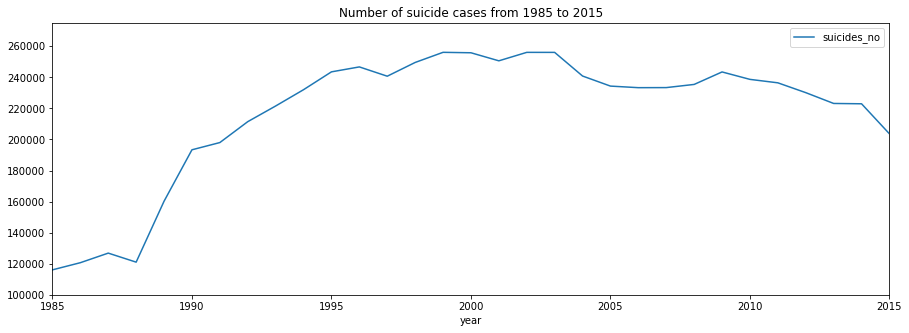

In [12]:
# group data by year, and take the sum of the number of suicides in the year
df1 = df1.groupby('year').sum('suicides_no')
df1.plot(figsize=(15,5))
plt.xlim([1985, 2015])
plt.ylim([100000, 275000])
plt.title('Number of suicide cases from 1985 to 2015')
plt.show()

From the graph above, it can be seen that the number of suicide case rose dramatically from 1988 to 1995. From thereon, the number of cases became more consistent.

<h4>Section 2</h4>
<br>
This section shows the gives a summary on the total number of suicides by age range in 101 countries in the world per year.

In [13]:
# select relevant columns
df2 = suicide_df[['year', 'suicides_no', 'age']]

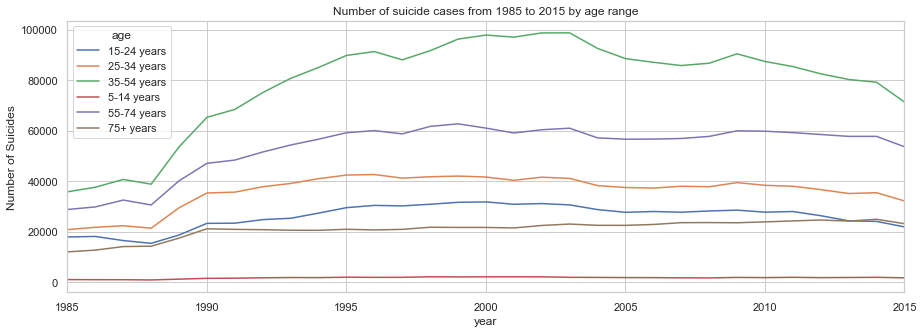

In [35]:
df2 = df2.groupby(['year', 'age']).sum('suicides_no')

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, x='year', y='suicides_no', hue='age', data=df2)
plt.ylabel('Number of Suicides')
plt.xlim([1985, 2015])
plt.title('Number of suicide cases from 1985 to 2015 by age range')
plt.show()

The outcome is very intriguing. There are almost no overlaps between the trend of different age ranges. From this data, we can actually say that people mostly commit suicide at the age of 35-54 years old.

<h3>Exploratory Analyses</h3>
<h4>Section 3</h4>
<br>
Numerous sources menetion that men are more likely to commit suicide than women. This section will test the accuracy of this statement.

In [15]:
# select relevant columns
df3 = suicide_df[['year', 'sex', 'suicides_no']]

In [16]:
# group data by year, and take the sum of the number of suicides in the year
df3 = df3.groupby(['year', 'sex']).sum('suicides_no')

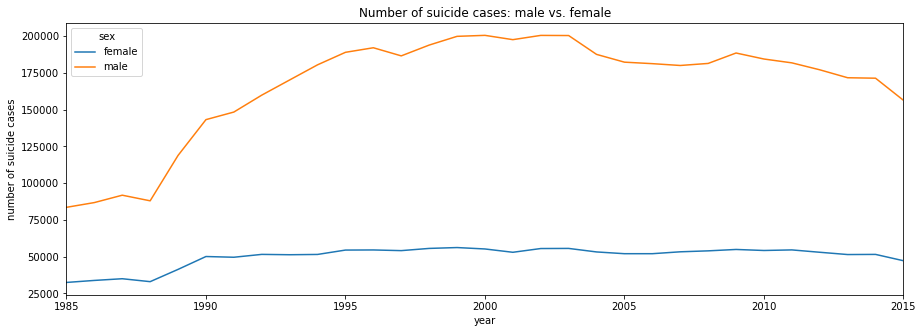

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, x='year', y='suicides_no', hue='sex', data=df3)
plt.ylabel('number of suicide cases')
plt.xlim([1985, 2015])
plt.title('Number of suicide cases: male vs. female')
plt.show()

Considering that the 2018 estimate of the global sex ratio is 101 males to 100 females, this is a very big difference in magnitude. It is interesting how between 1987 to 1990, the number of female and male suicide cases were both rising.

<h4>Section 4</h4>
<br>
There is a stereotype that asian parents are stricter when it comes to raising their children. This culture is more likely to negtively affect the mental well-being of a person. To actually test the accuracy of this hypothesis, this will compare the data of people, aged 5-24, commiting suicide from asian to non-asian countries.

In [18]:
# filter out the unnecessary age ranges and select only necessary columns
df4 = suicide_df[(suicide_df.age == '15-24 years') | (suicide_df.age == '5-14 years')]
df4 = df4[['country', 'year', 'age', 'suicides/100k pop']]

In [19]:
# join with country_df to add a continent column
df4 = df4.join(country_df.set_index('country'), on='country')

In [20]:
# First, we need to calculate the total number of suicides in a country per year
suicide_by_country_per_year = df4.groupby(['year', 'continent', 'country'])

# we sum the number of suicides per 100k population from the two age ranges per country per year
df4 = suicide_by_country_per_year.sum('suicides/100k pop')

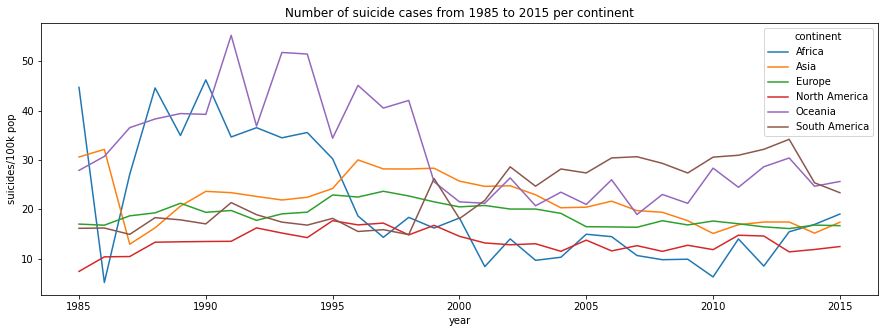

In [21]:
# now that we have the number of teens who committed suicide per 100k pop per country per continent per
# year, we can then group the numbers by continent per year and average them
suicide_by_continent_per_year = df4.groupby(['year', 'continent'])

df4 = suicide_by_continent_per_year.mean('suicides/100k pop')

fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, x='year', y='suicides/100k pop', hue='continent', data=df4)
plt.title('Number of suicide cases from 1985 to 2015 per continent')
plt.show()

Asia was only topped between 1999 and 2001. There is an huge drop of cases in Africa in 1986. This is anomaly is probably caused by inaccurate data gathering. South America had an overall increase in the number of suicide cases as time passed. On the other hard, Europe and North America have a relatively stable number of suicide cases over the years.

<h4>Section 5</h4>
<br>
The considering of mental health as an actual health concern was relatively recent. This part may be a bit controversial, but suddenly, a lot of teens today have anxiety and depression. And that is the leading cause of suicide, according to Boston Children's Hospital. Back then, teens didn't care about their mental health, nor do they even know that such a thing existed. I want to test whether the awareness of mental health actually increased the number of suicide cases.

In [22]:
# filter data to children or teens only
df5 = suicide_df[(suicide_df.age == '15-24 years') | (suicide_df.age == '5-14 years')]

# select relevant columns only
df5 = df5[['suicides_no', 'generation']]

In [23]:
# group data
df5_by_generation = df5.groupby(['generation'])

temp = df5_by_generation.sum('suicides_no')
# df4_by_generation.count()

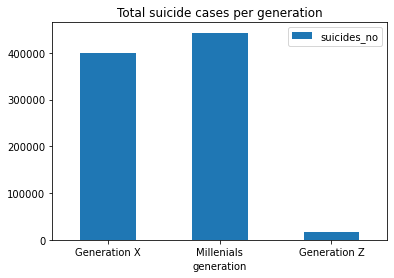

In [24]:
temp.loc[['Generation X', 'Millenials', 'Generation Z']].plot(kind='bar', rot=0)
plt.title('Total suicide cases per generation')
plt.show()

There is an increase in the number of cases from Generation X to Millenials. But due to the lack of data for more recent years, the numbers for Generation Z are yet to grow.

<h4>Section 6</h4>
<br>
This last section will explore whether there is a correlation between the gdp per capita and the number of suicide cases for people 75 years old and above.

In [25]:
# filter data
df6 = suicide_df[suicide_df.age == '75+ years']

In [26]:
# get the total number of deaths per country per year, and compare it with the gdp per capita
df6 = df6.groupby(['year', 'country', 'gdp_per_capita ($)'], as_index=False)
df6 = df6.sum('suicides/100k pop')[['gdp_per_capita ($)', 'suicides/100k pop']]

In [27]:
# calculate the pearson correlation coefficient
df6['gdp_per_capita ($)'].corr(df6['suicides/100k pop'])

0.02317631118180305

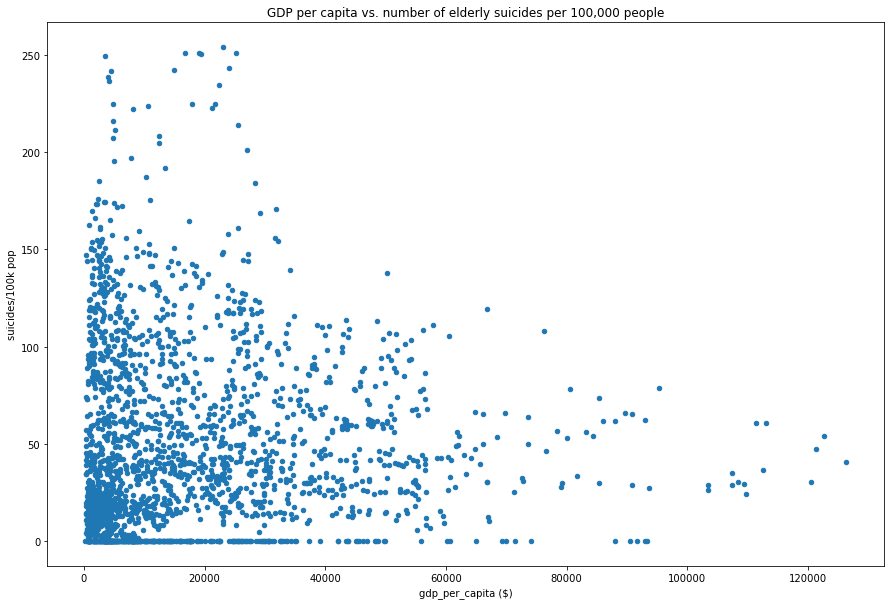

In [28]:
# show a scatterplot
df6.plot.scatter('gdp_per_capita ($)', 'suicides/100k pop',figsize=(15,10))
plt.title('GDP per capita vs. number of elderly suicides per 100,000 people')
plt.show()

It can be seen from the graph that there is a weak correlation between the GDP per capita and the number of suicide cases for elderly people. This can be supported by the calculated Pearson coeffient.

<h3>Data Visualization</h3>
<br>
Final visualizations of all the things learned from this project.

In [29]:
sns.set_theme(style='whitegrid')

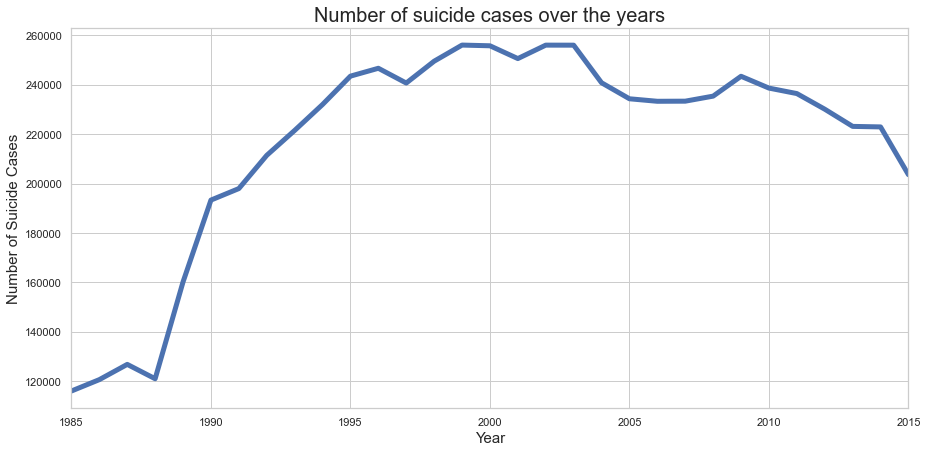

In [30]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(ax=ax, x='year', y='suicides_no', data=df1, linewidth=5)
plt.ylabel('Number of Suicide Cases', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim([1985, 2015])
plt.title('Number of suicide cases over the years', fontsize=20)
plt.show()

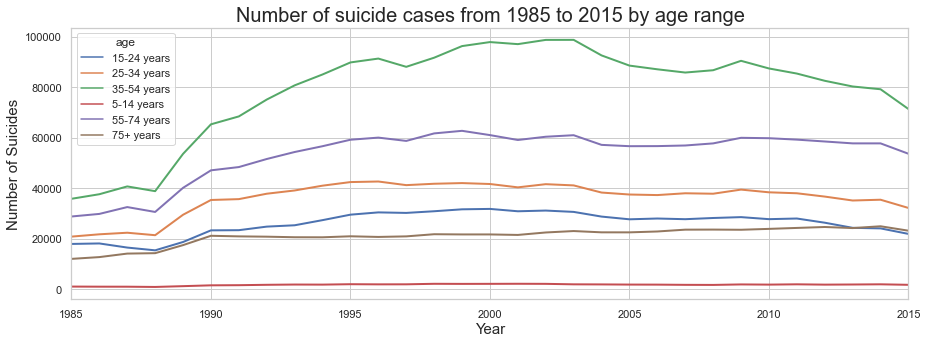

In [39]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(ax=ax, x='year', y='suicides_no', hue='age', data=df2, linewidth=2)
plt.ylabel('Number of Suicides', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim([1985, 2015])
plt.title('Number of suicide cases from 1985 to 2015 by age range', fontsize=20)
plt.show()

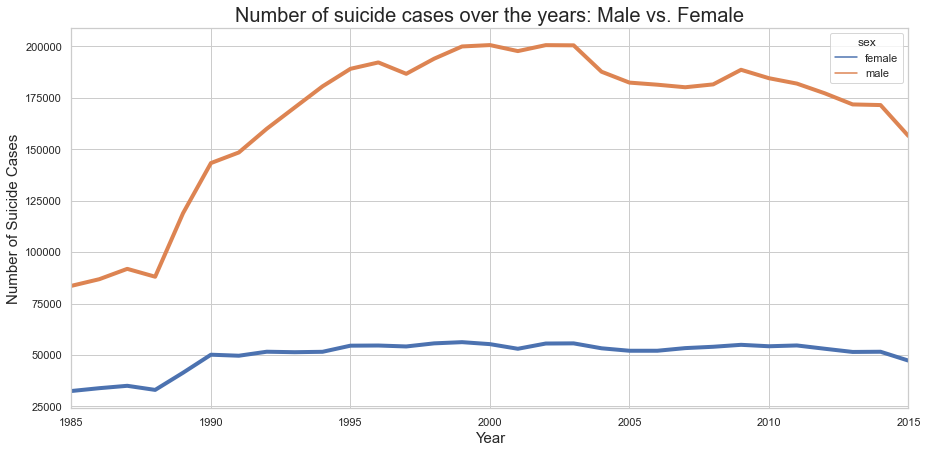

In [31]:
fig, ax = plt.subplots(figsize=(15, 7))

sns.lineplot(ax=ax, x='year', y='suicides_no', hue='sex', data=df3, linewidth=4)
plt.ylabel('Number of Suicide Cases', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.xlim([1985, 2015])
plt.title('Number of suicide cases over the years: Male vs. Female', fontsize=20)
plt.show()

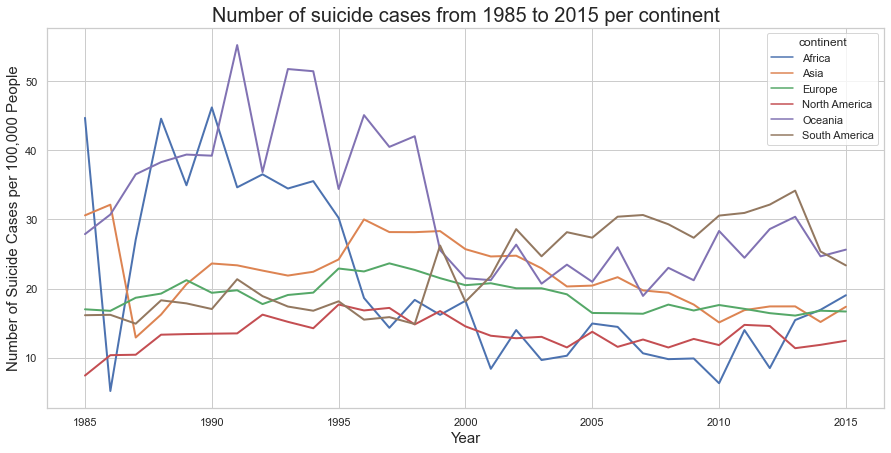

In [32]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.lineplot(ax=ax, x='year', y='suicides/100k pop', hue='continent', data=df4, linewidth=2)
plt.title('Number of suicide cases from 1985 to 2015 per continent', fontsize=20)
plt.ylabel('Number of Suicide Cases per 100,000 People', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

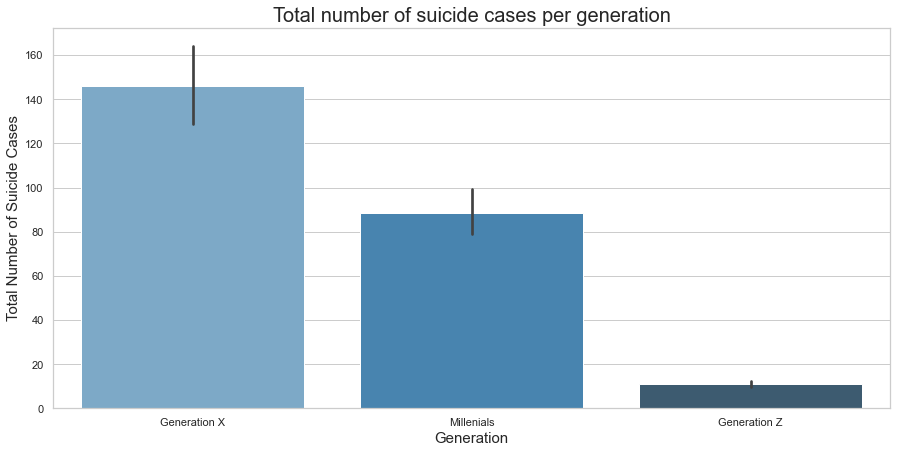

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.barplot(ax=ax, x='generation', y='suicides_no', data=df5, palette="Blues_d")
plt.title('Total number of suicide cases per generation', fontsize=20)
plt.ylabel('Total Number of Suicide Cases', fontsize=15)
plt.xlabel('Generation', fontsize=15)
plt.show()

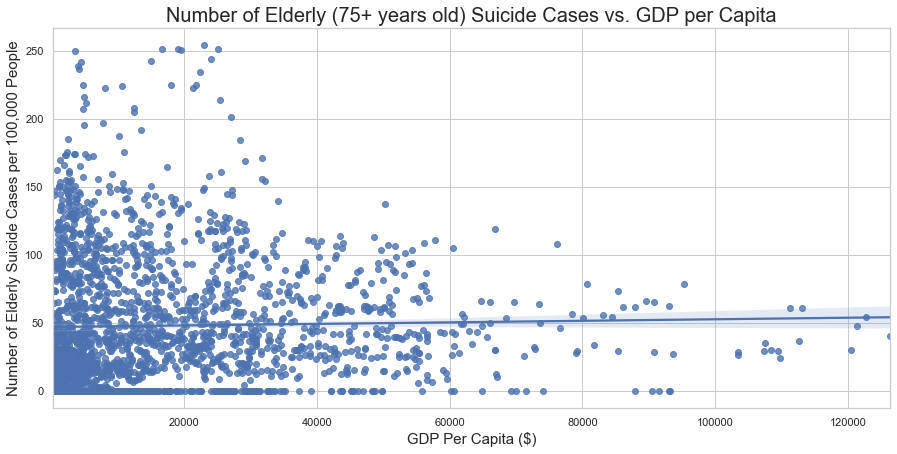

In [34]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(ax=ax, x='gdp_per_capita ($)', y='suicides/100k pop', data=df6)
plt.ylabel('Number of Elderly Suicide Cases per 100,000 People', fontsize=15)
plt.xlabel('GDP Per Capita ($)', fontsize=15)
plt.title('Number of Elderly (75+ years old) Suicide Cases vs. GDP per Capita', fontsize=20)
plt.show()